In [ ]:
%%shell

rm -rf ./logs/

file="./logs/"
if [ -d "$file" ]
then
	echo "$file found."
else
    export fileid=1zHonehkiRRC7-hpC-NsYVOkos4a5MKZw
    export filename=images.tar.gz

    wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='$fileid -O- \
         | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt

    wget --load-cookies cookies.txt -O $filename \
         'https://docs.google.com/uc?export=download&id='$fileid'&confirm='$(<confirm.txt)

    rm -f confirm.txt cookies.txt
    
    #unzip $filename -d ./logs | awk 'BEGIN {ORS=" "} {if(NR%10==0)print "."}'
fi

--2020-06-26 02:09:22--  https://docs.google.com/uc?export=download&id=1zHonehkiRRC7-hpC-NsYVOkos4a5MKZw
Resolving docs.google.com (docs.google.com)... 74.125.24.101, 74.125.24.100, 74.125.24.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.17K  --.-KB/s    in 0s      

2020-06-26 02:09:22 (59.2 MB/s) - written to stdout [3249]

--2020-06-26 02:09:22--  https://docs.google.com/uc?export=download&id=1zHonehkiRRC7-hpC-NsYVOkos4a5MKZw&confirm=j6h9
Resolving docs.google.com (docs.google.com)... 74.125.24.101, 74.125.24.100, 74.125.24.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-2k-docs.googleusercontent.com/docs/securesc/0v8lh6h6emknlspjjkl7lsct7r5tqm7o/00dgnkd2s8sarsc45l

In [ ]:
%%shell

rm -rf ./logs/

file="./logs/"
if [ -d "$file" ]
then
	echo "$file found."
else
    export fileid=1eSBWgwokSh2i0pj7ck-ou1aFA0UgPi3F
    export filename=annotations.tar.gz

    wget --save-cookies cookies.txt 'https://docs.google.com/uc?export=download&id='$fileid -O- \
         | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1/p' > confirm.txt

    wget --load-cookies cookies.txt -O $filename \
         'https://docs.google.com/uc?export=download&id='$fileid'&confirm='$(<confirm.txt)

    rm -f confirm.txt cookies.txt
    
    # unzip $filename -d ./logs | awk 'BEGIN {ORS=" "} {if(NR%10==0)print "."}'
fi

--2020-06-26 02:09:34--  https://docs.google.com/uc?export=download&id=1eSBWgwokSh2i0pj7ck-ou1aFA0UgPi3F
Resolving docs.google.com (docs.google.com)... 74.125.24.101, 74.125.24.100, 74.125.24.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.24.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pf8bncdqjl7sr5pekisiqlle41if6pd0/1593137400000/06395845422797361124/*/1eSBWgwokSh2i0pj7ck-ou1aFA0UgPi3F?e=download [following]
--2020-06-26 02:10:04--  https://doc-0g-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pf8bncdqjl7sr5pekisiqlle41if6pd0/1593137400000/06395845422797361124/*/1eSBWgwokSh2i0pj7ck-ou1aFA0UgPi3F?e=download
Resolving doc-0g-4c-docs.googleusercontent.com (doc-0g-4c-docs.googleusercontent.com)... 74.125.24.132, 2404:6800:4003:c03::84
Connecting to doc-0g-4c-docs.googleusercontent.com (doc-0g-4c-docs.g

In [ ]:
!pwd
# /content/drive/My Drive/data/Pet_Dataset/annotations.tar.gz
# /content/drive/My Drive/data/Pet_Dataset/images.tar.gz

/content


# 데이터 준비

In [1]:
import tarfile
annotation_file = tarfile.open(r'/content/drive/My Drive/data/Pet_Dataset/annotations.tar.gz', "r:gz")
for tarinfo in annotation_file:
  annotation_file.extract(tarinfo, r'/content/dataset')

In [2]:
iamges_file = tarfile.open(r'/content/drive/My Drive/data/Pet_Dataset/images.tar.gz', "r:gz")
for tarinfo in iamges_file:
  iamges_file.extract(tarinfo, r'/content/dataset')

# 라이브러리 import

In [3]:
import os
from glob import glob

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from PIL import Image
import tensorflow.keras.backend as K
from tqdm import tqdm_notebook

%matplotlib inline

# 데이터 경로 불러오기
- image와 label값이 개수는 같음
- 순서는 같은가? -> 다르다
- image경로를 사용해서 순서를 맞춘다

In [4]:
os.listdir('dataset/annotations')

['xmls',
 'test.txt',
 'trimaps',
 'list.txt',
 '._trimaps',
 'trainval.txt',
 'README']

In [5]:
image_paths = glob('dataset/images/*.jpg')
label_paths = glob('dataset/annotations/trimaps/*.png')
len(image_paths), len(label_paths)

(7390, 7390)

In [6]:
image_paths[0]

'dataset/images/Birman_192.jpg'

In [7]:
label_paths[0]

'dataset/annotations/trimaps/german_shorthaired_86.png'

In [9]:
tmp_label_paths = image_paths

image_paths = []
label_paths = []

for img_path in tmp_label_paths :
  lbl_path = img_path.replace('images', 'annotations/trimaps').replace('.jpg', '.png')
  if os.path.exists(lbl_path) :
    image_paths.append(img_path)
    label_paths.append(lbl_path)

len(image_paths), len(label_paths)

(7390, 7390)

# Image의 채널 수를 확인

In [10]:
tmp = []
im = []
for img_path in tqdm_notebook(image_paths) :
  img = tf.io.read_file(img_path)
  img = tf.io.decode_jpeg(img)
  _, _, c = img.shape
  if c not in tmp :
    tmp.append(c)
    im.append(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
tmp
# 채널이 4와 1도 존재
# 4 : 투명도 정보까지 포함
# 1 : 흑백이미지

[3, 4, 1]

In [12]:
lbl_tmp = []

for lbl_path in tqdm_notebook(label_paths) :
    lbl = tf.io.read_file(lbl_path)
    lbl = tf.io.decode_png(lbl)
    _, _, c = lbl.shape
    if c not in lbl_tmp :
        lbl_tmp.append(c)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
lbl_tmp

[1]

# Image, Label 확인

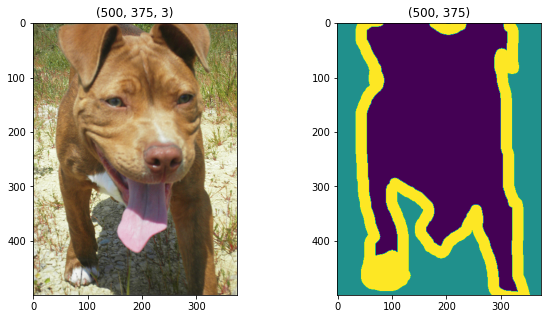

[1 2 3]


In [ ]:
image = np.array(Image.open(image_paths[10]))
label = np.array(Image.open(label_paths[10]))
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title(image.shape)
plt.imshow(image)
plt.subplot(122)
plt.title(label.shape)
plt.imshow(label)
plt.show()
print(np.unique(label))

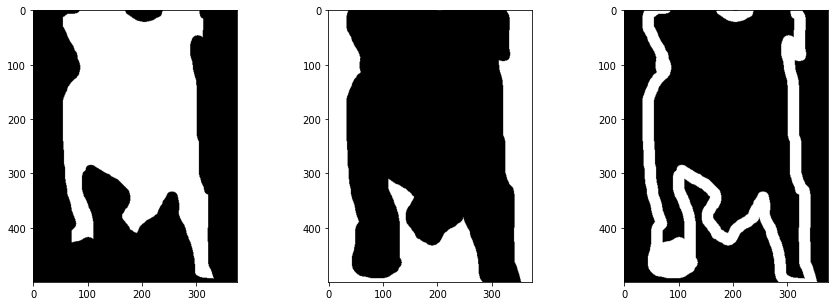

In [ ]:
plt.figure(figsize=(15, 5))
  
for i in range(1, 4) :
  plt.subplot(131+(i-1))
  plt.imshow(np.where(label==i, 1, 0), 'gray')
plt.show()

label값 : 1, 2, 3  
1 : 동물  
2 : 배경  
3 : 테두리  
trimaps/	
  Trimap annotations for every image in the dataset  
Pixel Annotations: 1: Foreground 2:Background 3: Not classified

# 클래스 만들기

(500, 375)


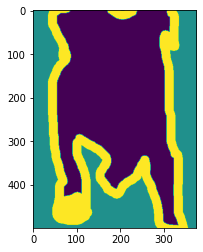

In [ ]:
lbl = tf.io.read_file(label_paths[10])
lbl = tf.io.decode_png(lbl)
lbl = tf.squeeze(lbl)

print(lbl.shape)
plt.imshow(lbl)
plt.show()

In [ ]:
from tqdm import tqdm_notebook

class_nums = []
for path in tqdm_notebook(label_paths) :
  lbl = tf.io.read_file(path)
  lbl = tf.io.decode_png(lbl)
  # lbl = tf.where(lbl == 3, 1, lbl)
  unique_lbl = np.unique(lbl)
  
  for l in unique_lbl :
    if l not in class_nums :
      class_nums.append(l)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [ ]:
class_nums
# 1, 2, 3 -> 0, 1, 2
# background = 0

[1, 2, 3]

# Hyperparameter Setting

In [ ]:
batch_size = 10
epochs = 5
drop_rate = 0.2
input_shape = (256, 256, 3)

# Data_preprocess Function

In [ ]:
def data_preprocess(img_path, lbl_path) :
  img = tf.io.read_file(img_path)
  image = tf.io.decode_jpeg(img, channels=3) / 255
  image = tf.image.resize(image, input_shape[:2])
  image.set_shape([256, 256, 3])
  
  label_tf = tf.io.read_file(lbl_path)
  label_tf = tf.io.decode_png(label_tf, channels=1)
  label = tf.image.resize(label_tf, input_shape[:2], 'nearest')
  label.set_shape([256, 256, 1])
  label = tf.cast(label, tf.uint8)
  label -= 1
  label = tf.squeeze(label)
  label_onehot = tf.one_hot(label, 3)

  return image, label_onehot

# Dataset 만들기

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((image_paths, label_paths))
dataset = dataset.map(data_preprocess)

In [ ]:
image, label = next(iter(dataset))
image.shape, label.shape

print(np.unique(label))

[0. 1.]


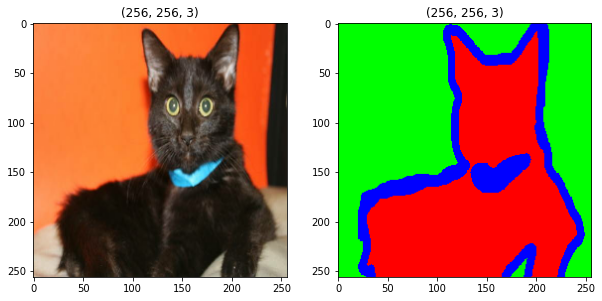

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title(image.shape)
plt.imshow(image)
plt.subplot(122)
plt.title(label.shape)
plt.imshow(label)
plt.show()

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((image_paths, label_paths))
dataset = dataset.map(data_preprocess)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(10)
dataset = dataset.repeat()

# Build Net

In [ ]:
image, label = next(iter(dataset))
image.shape, label.shape

(TensorShape([10, 256, 256, 3]), TensorShape([10, 256, 256, 3]))

In [ ]:
# Build UNet
inputs = layers.Input(input_shape)

# Encoding
conv1 = layers.Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = layers.BatchNormalization()(conv1)
conv1 = layers.Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv1)
conv1 = layers.BatchNormalization()(conv1)
conv1 = layers.Activation("relu")(conv1)
pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = layers.Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = layers.BatchNormalization()(conv2)
conv2 = layers.Activation("relu")(conv2)
conv2 = layers.Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv2)
conv2 = layers.BatchNormalization()(conv2)
conv2 = layers.Activation("relu")(conv2)
pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = layers.Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = layers.BatchNormalization()(conv3)
conv3 = layers.Activation("relu")(conv3)
conv3 = layers.Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv3)
conv3 = layers.BatchNormalization()(conv3)
conv3 = layers.Activation("relu")(conv3)
pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = layers.Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = layers.BatchNormalization()(conv4)
conv4 = layers.Activation("relu")(conv4)
conv4 = layers.Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv4)
conv4 = layers.BatchNormalization()(conv4)
conv4 = layers.Activation("relu")(conv4)
drop4 = layers.Dropout(drop_rate)(conv4)
pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = layers.Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = layers.BatchNormalization()(conv5)
conv5 = layers.Activation("relu")(conv5)
conv5 = layers.Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal')(conv5)
conv5 = layers.BatchNormalization()(conv5)
conv5 = layers.Activation("relu")(conv5)
drop5 = layers.Dropout(drop_rate)(conv5)

# Decoding
up6 = layers.Conv2DTranspose(1024, 2, padding='same', strides=(2, 2))(drop5)
merge6 = layers.concatenate([drop4, up6], axis=3)
conv6 = layers.Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = layers.BatchNormalization()(conv6)
conv6 = layers.Activation("relu")(conv6)
conv6 = layers.Conv2D(512, 3, padding = 'same', kernel_initializer = 'he_normal')(conv6)
conv6 = layers.BatchNormalization()(conv6)
conv6 = layers.Activation("relu")(conv6)

up7 = layers.Conv2DTranspose(512, 2, padding='same', strides=(2, 2))(conv6)
merge7 = layers.concatenate([conv3, up7], axis=3)
conv7 = layers.Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = layers.BatchNormalization()(conv7)
conv7 = layers.Activation("relu")(conv7)
conv7 = layers.Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal')(conv7)
conv7 = layers.BatchNormalization()(conv7)
conv7 = layers.Activation("relu")(conv7)

up8 = layers.Conv2DTranspose(256, 2, padding='same', strides=(2, 2))(conv7)
merge8 = layers.concatenate([conv2, up8], axis=3)
conv8 = layers.Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = layers.BatchNormalization()(conv8)
conv8 = layers.Activation("relu")(conv8)
conv8 = layers.Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal')(conv8)
conv8 = layers.BatchNormalization()(conv8)
conv8 = layers.Activation("relu")(conv8)

up9 = layers.Conv2DTranspose(128, 2, padding='same', strides=(2, 2))(conv8)
merge9 = layers.concatenate([conv1, up9], axis=3)
conv9 = layers.Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = layers.BatchNormalization()(conv9)
conv9 = layers.Activation("relu")(conv9)
conv9 = layers.Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = layers.BatchNormalization()(conv9)
conv9 = layers.Activation("relu")(conv9)
conv9 = layers.Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
conv10 = layers.Conv2D(3, 1, activation = 'sigmoid')(conv9)

model = tf.keras.Model(inputs=inputs, outputs=conv10)

In [ ]:
# Dice Coefficient
def precision(y_true, y_pred):
    axes = tuple(range(1, len(y_pred.shape)-1))
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axes)
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axes)
    precision = true_positives / (predicted_positives + K.epsilon())
    
    return K.mean(precision)


def recall(y_true, y_pred):
    axes = tuple(range(1, len(y_pred.shape)-1))
    
    true_positives = K.sum(K.round(K.Aclip(y_true * y_pred, 0, 1)), axes)
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)), axes)
    recall = true_positives / (possible_positives + K.epsilon())
    
    return K.mean(recall)

def dice(y_true, y_pred):
    epsilon=1e-6
    axes = tuple(range(1, len(y_pred.shape)-1)) 
    numerator = 2. * K.sum(y_pred * y_true, axes)
    denominator = K.sum(K.square(y_pred) + K.square(y_true), axes)
    
    return K.mean(numerator / (denominator + epsilon))

def soft_dice_loss(y_true, y_pred):
    epsilon=1e-6
    axes = tuple(range(1, len(y_pred.shape)-1)) 
    numerator = 2. * K.sum(y_pred * y_true, axes)
    denominator = K.sum(K.square(y_pred) + K.square(y_true), axes)
    
    return 1 - K.mean(numerator / (denominator + epsilon))

In [ ]:
model.compile(loss=soft_dice_loss,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy', dice])

In [ ]:
step_per_epochs = len(image_paths) // batch_size

model.fit(dataset, steps_per_epoch=step_per_epochs, epochs=5)

Epoch 1/5
739/739 [==============================] - 977s 1s/step - loss: 0.3915 - accuracy: 0.8401 - dice: 0.6085
Epoch 2/5
739/739 [==============================] - 978s 1s/step - loss: 0.3873 - accuracy: 0.8449 - dice: 0.6127
Epoch 3/5
739/739 [==============================] - 978s 1s/step - loss: 0.3831 - accuracy: 0.8498 - dice: 0.6169
Epoch 4/5
739/739 [==============================] - 979s 1s/step - loss: 0.3791 - accuracy: 0.8542 - dice: 0.6209
Epoch 5/5
739/739 [==============================] - 981s 1s/step - loss: 0.3769 - accuracy: 0.8565 - dice: 0.6231


In [ ]:
p = 'dataset/images/american_bulldog_42.jpg'
# os.path.exists(p)
p = tf.io.read_file(p)
p = tf.io.decode_jpeg(p)
origin_p = p
p = p[tf.newaxis, ...]
p = tf.image.resize(p, (256, 256))
p.shape

TensorShape([1, 256, 256, 3])

In [ ]:
preds = model.predict(p)

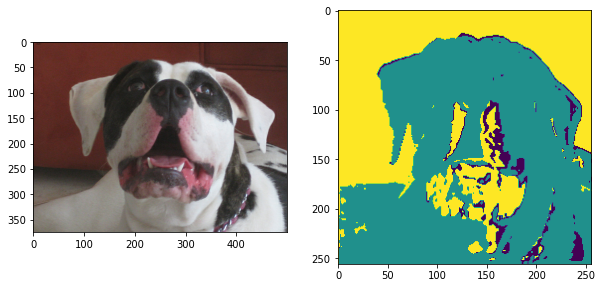

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(origin_p)
plt.subplot(122)
plt.imshow(np.argmax(preds[0], -1))
plt.show()